In [2]:
import numpy as np
import random
import sys
import importlib
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from Data.Data import DataLoader

In [3]:
# create an instance of the DataLoader class and initialize 
distortions = ['shot_noise', 'motion_blur']  # desired distortions

# instantiate train and test datasets
train_data_obj = DataLoader('train', distortions)
test_data_obj = DataLoader('test', distortions)

# load data
data_dict = train_data_obj.load()
data_dict_test = test_data_obj.load()


In [4]:
# set sample size
sample_size = 500

# create clean dataset
filtered_clean = data_dict['clean'][:sample_size]

# create noisy dataset
filtered_motion_blur = data_dict['motion_blur'][:sample_size]
filtered_shot_noise = data_dict['shot_noise'][:sample_size]

# alternating between motion_blur and shot_noise photos
filtered_noisy = []

for i in range(sample_size):
    if random.random() < 0.5:  # randomly select motion_blur or shot_noise
        filtered_noisy.append(filtered_motion_blur[i])
    else:
        filtered_noisy.append(filtered_shot_noise[i])


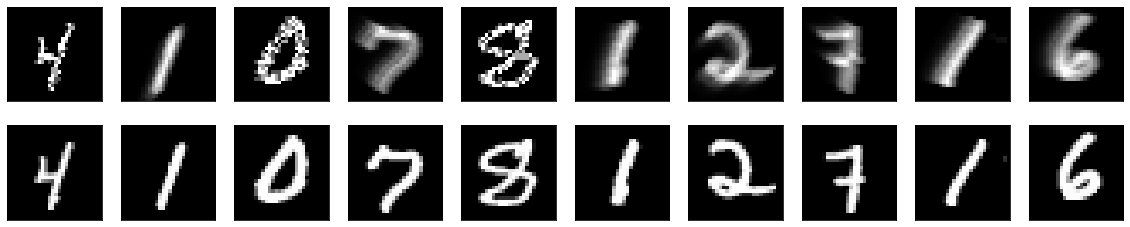

In [5]:
# display corrupted and clean images
DataLoader.display_10(filtered_noisy, filtered_clean)

In [28]:
# for testing only - reinstantiate python modules
from Model.denoiser_svhn_model import ConvDenoiser
importlib.reload(sys.modules['Model.model']) 
from Model.denoiser_svhn_model import ConvDenoiser

X_noisy = [item['image'] for item in filtered_noisy]
y_noisy = [item['label'] for item in filtered_noisy]

X_clean = [item['image'] for item in filtered_clean]
y_clean = [item['label'] for item in filtered_clean]

denoiser = ConvDenoiser(X_noisy, X_clean, y_noisy, y_clean)

history, score, predictions = denoiser.model(X_noisy, X_clean, y_noisy, y_clean)


Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 14, 14, 64)        2368      
                                                                 
 conv2d_19 (Conv2D)          (None, 7, 7, 256)         590080    
                                                                 
 flatten_11 (Flatten)        (None, 12544)             0         
                                                                 
 latent_vector (Dense)       (None, 64)                802880    
                                                                 
Total params: 1,395,328
Trainable params: 1,395,328
Non-trainable params: 0
_________________________________________________________________
Model: "decoder"
________________________________

INFO:tensorflow:Assets written to: denoising_autoenconder.model/assets


INFO:tensorflow:Assets written to: denoising_autoenconder.model/assets


16/16 [==============================] - 6s 324ms/step


In [29]:
predictions[0]

array([[[8.23147150e-09],
        [6.01892425e-11],
        [1.44204982e-12],
        [2.53217369e-13],
        [1.05719361e-12],
        [1.19512733e-12],
        [3.51188436e-12],
        [3.71434394e-12],
        [1.09144820e-11],
        [2.80325416e-11],
        [1.35031708e-10],
        [4.20221746e-10],
        [2.31529240e-09],
        [1.17791465e-08],
        [3.40559545e-08],
        [1.17168916e-07],
        [1.91321789e-07],
        [3.42553733e-07],
        [1.56054654e-07],
        [2.08628094e-07],
        [1.87954701e-08],
        [7.05485137e-09],
        [9.26832999e-10],
        [5.55299307e-10],
        [4.75933959e-10],
        [5.78893156e-10],
        [1.29957218e-08],
        [1.58552680e-07]],

       [[2.05666789e-10],
        [7.68805755e-13],
        [5.54306323e-15],
        [5.87372033e-16],
        [1.83305447e-15],
        [8.26768277e-15],
        [2.85299399e-14],
        [5.98821597e-14],
        [1.09730008e-13],
        [5.35104025e-13],
        [5

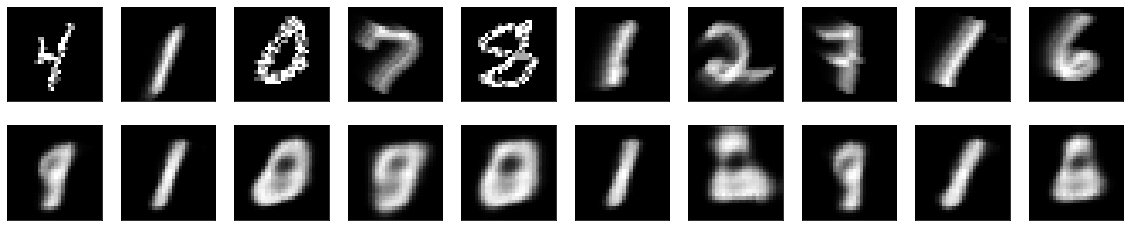

In [30]:
# display predictions against noisy input
DataLoader.display_10(X_noisy, predictions)

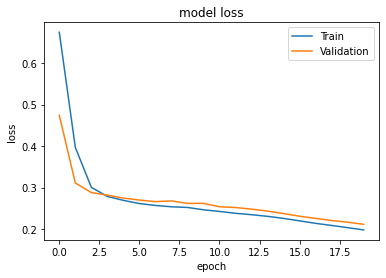

In [31]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [32]:
score

0.199414923787117